#Successfully executing the code and changing 4 hyperparameters in the model 

In [1]:
!pip install -q tf-nightly
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

In [3]:
# Set random seed for purposes of reproducibility
seed = 21

In [4]:
# loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
 # normalize the inputs from 0-255 to between 0 and 1 by dividing by 255   
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [7]:
class_num

10

In [8]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


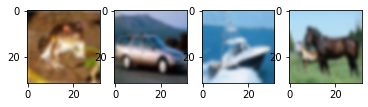

In [10]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [11]:
model = Sequential([
  # Change the filter of the conv2d
  layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:],  activation='relu'),
  # add a batch noramlization
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # add a batch noramlization
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  # add a batch noramlization
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_num, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
epochs=13
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

## I did 13 epochs and accuracy is 0.9391 val_accuracy is around 0.75. limit to 13 to avoid overfitting

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#Validating the model on 5 new images 

automobile


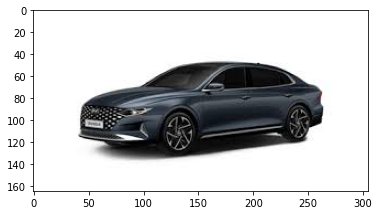

In [17]:

import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img = image.imread('/car.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0)    #Expanding dimension as our model expects a 4D object
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label

bird


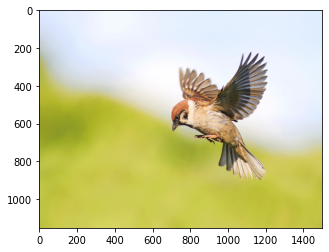

In [19]:


img = image.imread('/content/bird.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0)    #Expanding dimension
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label

ship


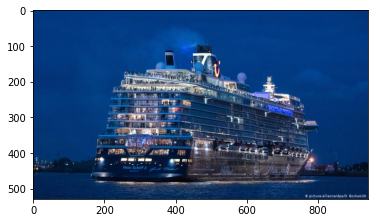

In [23]:

img = image.imread('/content/ship.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0)   #Expanding dimension
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label

deer


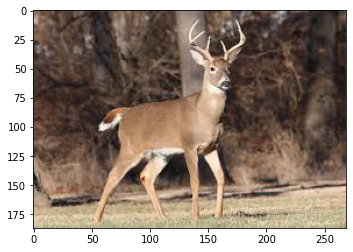

In [21]:

img = image.imread('/content/deer.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0)    #Expanding dimension
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label

dog


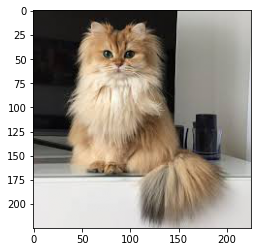

In [22]:
img = image.imread('/content/cat.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0) #Expanding dimension
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label